In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#View the first row to understand the makeup of the Measurement class
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23dc5609100>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 1.0, 'Inches of Precipitation per Day')

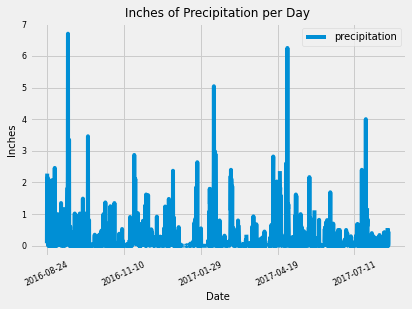

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date,Measurement.prcp).\
                filter(Measurement.date > dt.date(2016,8,23)).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xticks(fontsize=8,rotation=25)
plt.yticks(fontsize=8)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Inches",fontsize=10)
plt.legend(loc='upper right',fontsize=10)
plt.title("Inches of Precipitation per Day", fontsize=12)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_query = session.query(Measurement.station).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc())
most_active_station = session.execute(most_active_station_query).scalar()
most_active_station


[(max_tobs, min_tobs, avg_tobs)] = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
                                        filter(Measurement.station == most_active_station).all()

print(f"Highest temperature observation for station {most_active_station} = {max_tobs} degrees")
print(f"Lowest temperature observation for station {most_active_station} = {min_tobs} degrees")
print(f"Average temperature observation for station {most_active_station} = {avg_tobs} degrees")

Highest temperature observation for station USC00519281 = 85.0 degrees
Lowest temperature observation for station USC00519281 = 54.0 degrees
Average temperature observation for station USC00519281 = 71.66378066378067 degrees


Text(0.5, 1.0, 'Frequency of Certain Temperature occurring')

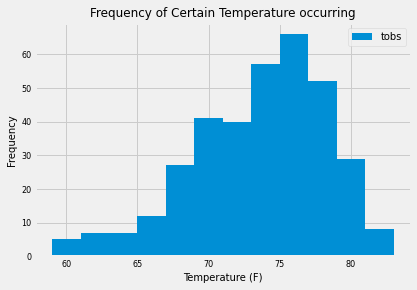

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Perform a query to retrieve the data and tobs scores
tobs_data = session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.date > dt.date(2016,8,23)).\
filter(Measurement.station == most_active_station).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_df = pd.DataFrame(tobs_data, columns=['date', 'tobs'])
tobs_df.set_index('date', inplace=True)

# Sort the dataframe by date
tobs_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
tobs_df.hist(bins=12,legend=True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=10)
plt.xlabel("Temperature (F)",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Frequency of Certain Temperature occurring", fontsize=12)

# Close session

In [17]:
# Close Session
session.close()